In [31]:
def imp():
  '''Se importan las librerías que permiten el uso de funcionalidades propias de árboles de decisión'''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
print(imp.__doc__)

Se importan las librerías que permiten el uso de funcionalidades propias de árboles de decisión


In [14]:
def dts():
  '''Se realiza la lectura del dataset'''
df = pd.read_csv("diabetes.csv")
print(dts.__doc__)
df.head()

Se realiza la lectura del dataset


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [15]:
def colm():
  '''Se definen las columnas, esto para diferenciar la etiqueta de las características'''
feature_cols = ['ID','No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
print(colm.__doc__)

Se definen las columnas, esto para diferenciar la etiqueta de las características


In [16]:
def en():
  '''Se usa label encoder para la transformación de los datos a datos accesibles para el entrenamiento'''
le = LabelEncoder()
df.No_Pation = le.fit_transform(df.No_Pation)
df.Gender = le.fit_transform(df.Gender)
df.AGE = le.fit_transform(df.AGE)
df.Urea = le.fit_transform(df.Urea)
df.Cr = le.fit_transform(df.Cr)
df.HbA1c = le.fit_transform(df.HbA1c)
df.Chol = le.fit_transform(df.Chol)
df.TG = le.fit_transform(df.TG)
df.HDL = le.fit_transform(df.HDL)
df.LDL = le.fit_transform(df.LDL)
df.VLDL = le.fit_transform(df.VLDL)
df.BMI = le.fit_transform(df.BMI)
df.CLASS = le.fit_transform(df.CLASS)
print(en.__doc__)

Se usa label encoder para la transformación de los datos a datos accesibles para el entrenamiento


In [17]:
def var():
  '''Se definen las variables características y la etiqueta'''
X = df.iloc[:,0:13].values 
y = df.iloc[:, -1].values
print(var.__doc__)

Se definen las variables características y la etiqueta


In [18]:
def vrx():
  '''Se imprime los valores de "X" transformados'''
print(vrx.__doc__)
print(X)

Se imprime los valores de "X" transformados
[[502 131   0 ...  15   4   9]
 [735 316   1 ...  25   5   7]
 [420 810   0 ...  15   4   9]
 ...
 [669 885   1 ...  28  37  19]
 [ 99 183   1 ...  33  46  60]
 [248 233   1 ...  34   6  38]]


In [21]:
def vry():
  '''Se imprime los valores de "y" transformados'''
print(vry.__doc__)
print(y)

Se imprime los valores de "y" transformados
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [20]:
def trn():
  '''División del tren de entrenamiento'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(trn.__doc__)

División del tren de entrenamiento


In [22]:
def ent():
  '''Creación del árbol de decisión, entrenamiento del modelo y predicción del modelo'''

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(ent.__doc__)

Creación del árbol de decisión, entrenamiento del modelo y predicción del modelo


In [23]:
def met():
  '''Cálculo de las métricas correspondientes al modelo'''
print(met.__doc__)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'micro'))


Cálculo de las métricas correspondientes al modelo
Accuracy: 0.9633333333333334
F1 Score: 0.9599762622454061
Recall: 0.9633333333333334


# Graficación del árbol de decisión

Definición del gráfico e impresión del mismo


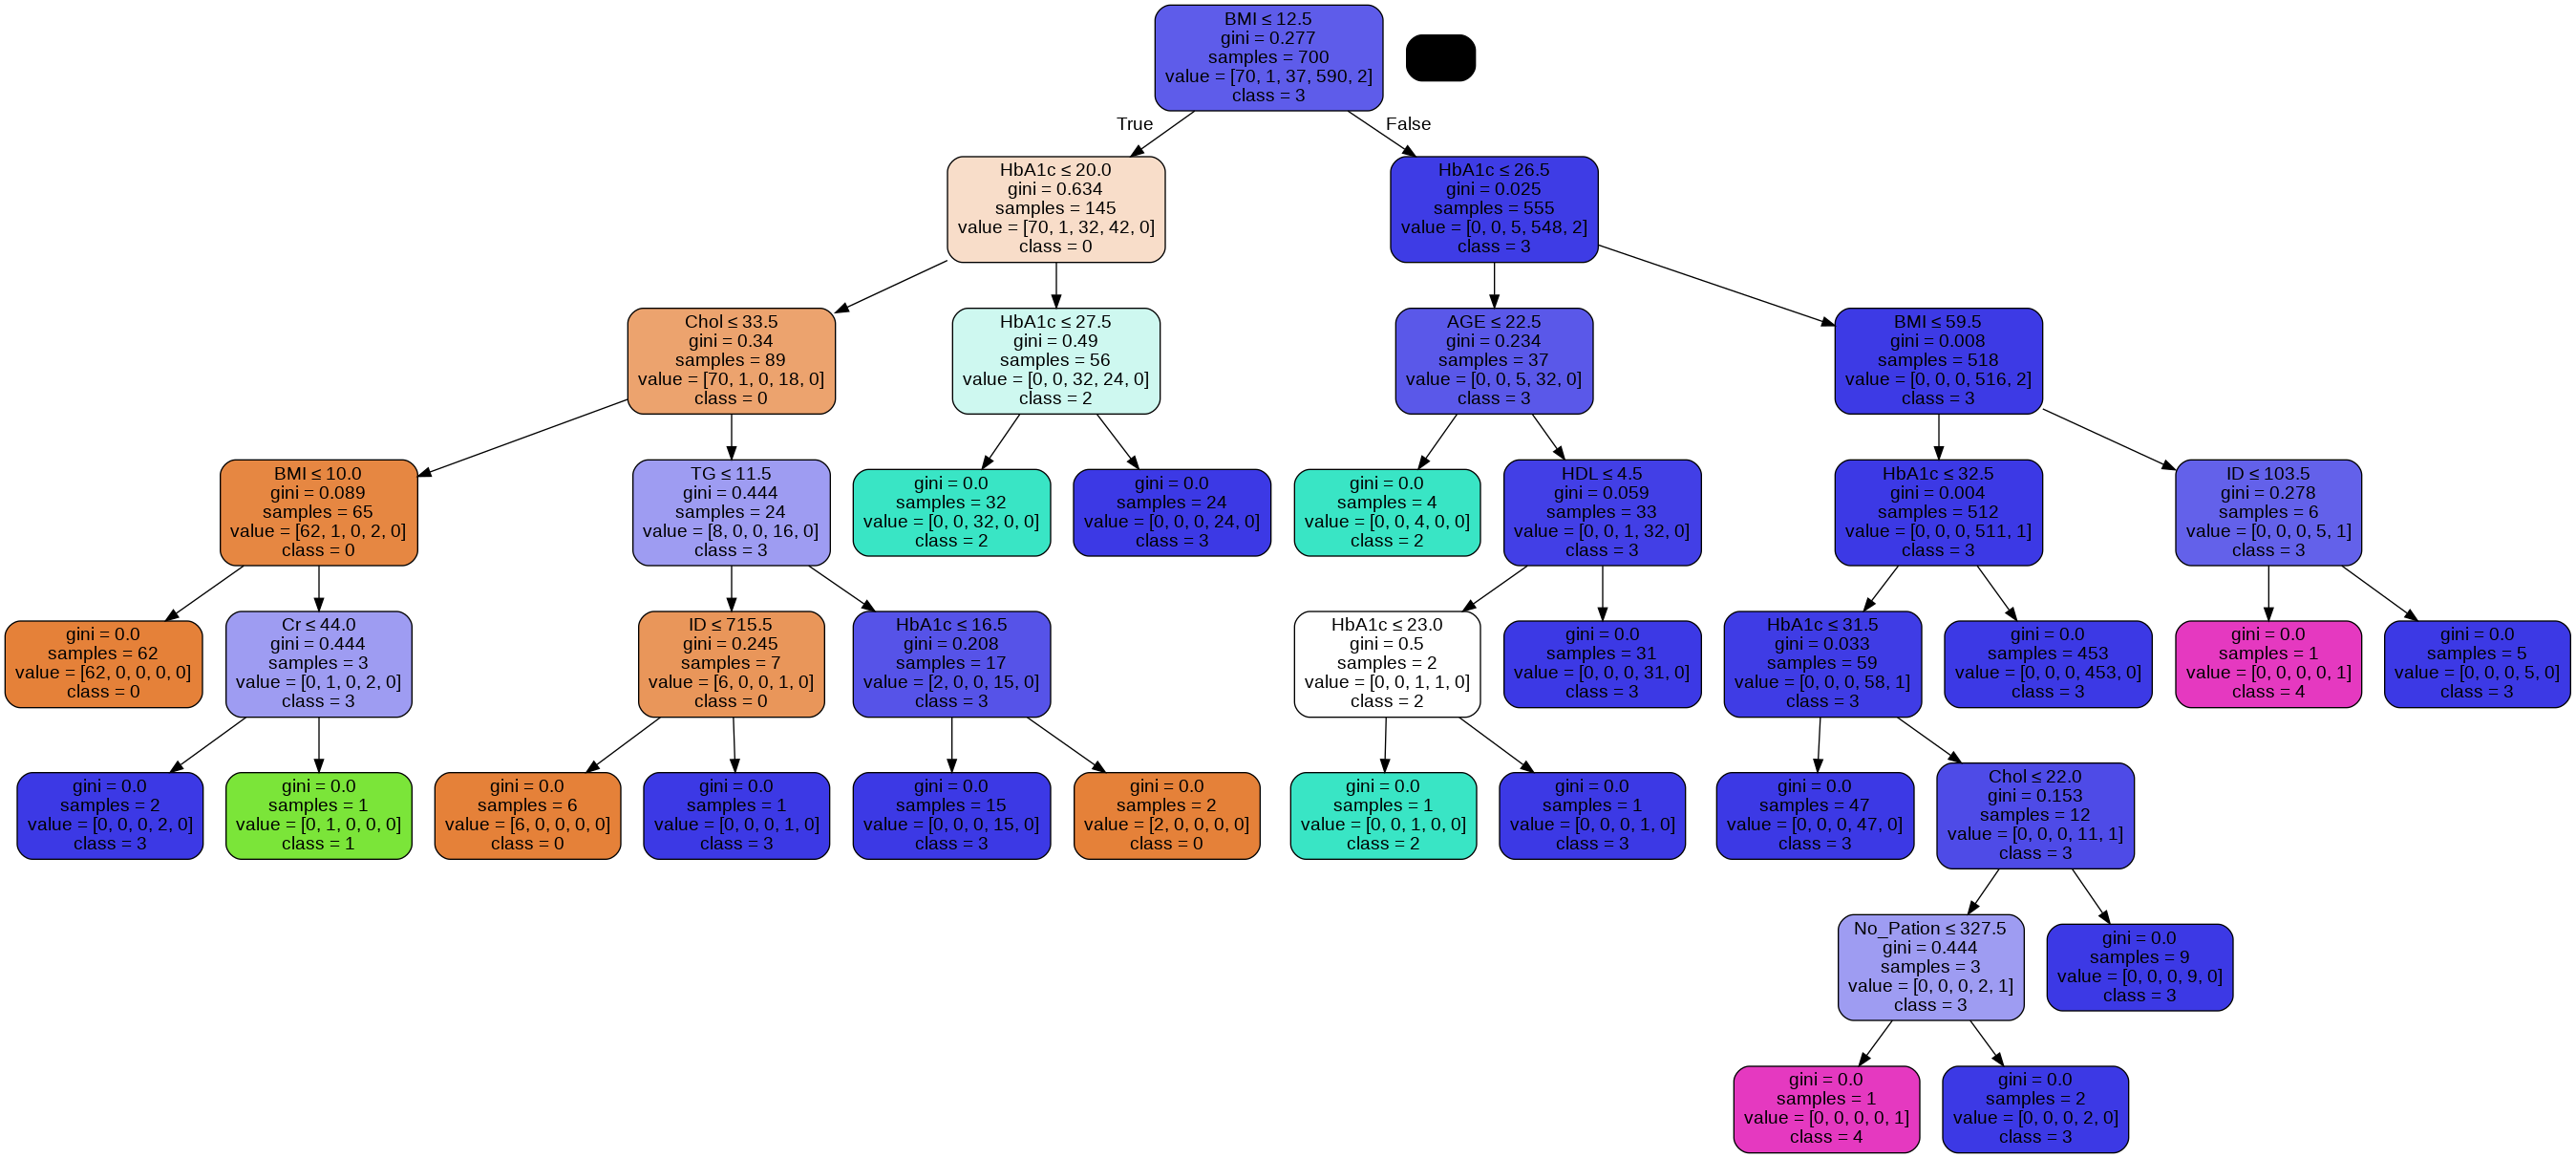

In [24]:
def ar():
  '''Definición del gráfico e impresión del mismo'''
print(ar.__doc__)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Pruning

In [25]:
def ent2():
  '''Entrenamiento del modelo con restricción de tamaño'''

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

print(ent2.__doc__)

Entrenamiento del modelo con restricción de tamaño


In [26]:
def met2():
  '''Cálculo del modelo entrenado nuevamente'''
print(met2.__doc__)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'micro'))

Cálculo del modelo entrenado nuevamente
Accuracy: 0.97
F1 Score: 0.9676653862569355
Recall: 0.97


Gráfico del árbol entrenado con menor cantidad de ramas


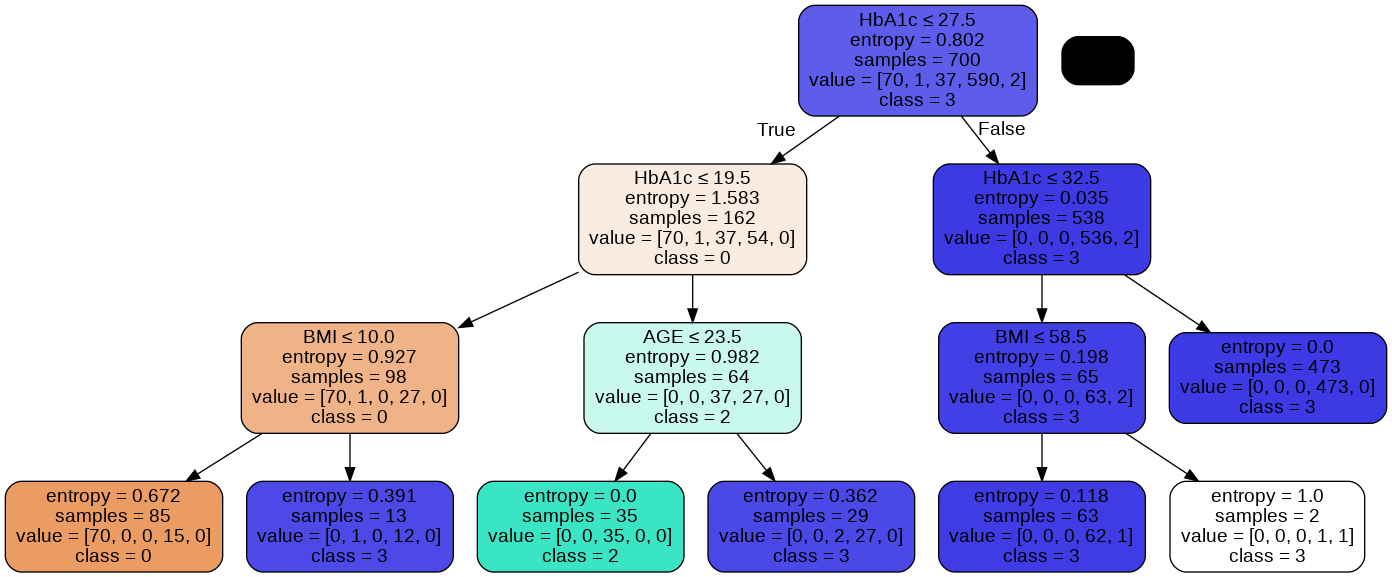

In [27]:
A

Graficación de la matriz de confución


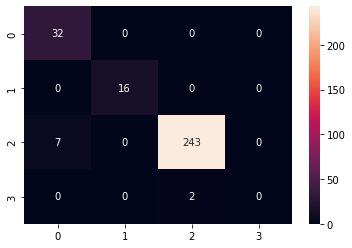

In [34]:
def mtx():
  '''Graficación de la matriz de confución'''
Matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(Matrix, annot=True, fmt= 'd')
print(mtx.__doc__)
plt.show()